# Problem 2: Machine Learning 

In [90]:
#import Library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

In [91]:
#Read the Dataset for train_data and train_label
data=pd.read_csv('train_data.tsv', delimiter='\t',index_col=0)
data_label=pd.read_csv('train_label.tsv',delimiter='\t',index_col=0)

In [92]:
data.head()

,S1186,S1187,S1188,S1189,S1190,S1191,S1193,S1194,S1195,S1196,...,S990,S991,S992,S993,S994,S995,S996,S997,S998,S999
A1BG,5.95,5.54,6.76,9.39,7.18,7.52,6.38,5.78,7.06,6.84,...,7.74,7.31,6.67,6.14,5.06,6.36,4.70,6.81,4.11,2.73
A1CF,0.00,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,5.33,0.00,0.00,7.55,0.00,8.73,7.99
A2M,12.67,13.09,14.00,12.97,17.84,13.58,13.52,12.83,12.32,13.55,...,16.44,13.81,13.06,15.40,13.84,13.13,15.14,14.85,14.45,15.42
A2ML1,10.51,1.07,1.11,0.00,1.67,1.70,0.00,8.77,0.75,1.52,...,0.82,7.15,0.88,0.79,0.00,1.38,0.40,4.85,0.00,0.00
A4GALT,6.08,7.56,8.34,6.47,6.75,9.21,6.68,7.56,6.20,6.35,...,9.65,8.41,6.62,9.60,9.07,8.30,10.54,8.05,10.92,9.24


In [93]:
#Extract the X_primary Disease column from the train_label and name it labels
labels=data_label['X_primary_disease']
labels.head()

S1186    breast invasive carcinoma
S1187    breast invasive carcinoma
S1188    breast invasive carcinoma
S1189    breast invasive carcinoma
S1190    breast invasive carcinoma
Name: X_primary_disease, dtype: object

In [94]:
data_new=data.T
data_new.head()

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
S1186,5.95,0.00,12.67,10.51,6.08,1.36,8.94,9.10,0.00,0.0,...,9.31,9.96,5.25,8.17,9.44,7.35,9.44,11.56,10.37,10.20
S1187,5.54,0.45,13.09,1.07,7.56,1.30,8.87,9.69,1.84,0.0,...,8.96,10.21,5.83,9.10,10.39,6.54,9.18,11.64,9.22,8.84
S1188,6.76,0.00,14.00,1.11,8.34,1.55,9.20,9.94,0.00,0.0,...,8.52,8.84,6.94,9.98,10.36,2.03,9.37,11.51,11.06,11.17
S1189,9.39,0.00,12.97,0.00,6.47,0.00,9.97,10.20,0.54,0.0,...,9.78,8.92,5.13,8.40,10.35,5.70,9.53,11.29,9.55,9.25
S1190,7.18,0.00,17.84,1.67,6.75,2.60,8.50,9.54,0.00,0.0,...,8.73,9.72,6.13,9.11,10.76,6.20,10.13,13.38,9.50,10.22


In [95]:
data_new['labels']=labels

# Encoding of the X_primary_diseases
'breast invasive carcinoma':0, 'kidney clear cell carcinoma':1, 'lung adenocarcinoma':2

In [96]:
data_new['encoded_label']=data_new['labels'].map({'breast invasive carcinoma':0,'kidney clear cell carcinoma':1,'lung adenocarcinoma':2})
data_new.head()

,A1BG,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,labels,encoded_label
S1186,5.95,0.00,12.67,10.51,6.08,1.36,8.94,9.10,0.00,0.0,...,5.25,8.17,9.44,7.35,9.44,11.56,10.37,10.20,breast invasive carcinoma,0
S1187,5.54,0.45,13.09,1.07,7.56,1.30,8.87,9.69,1.84,0.0,...,5.83,9.10,10.39,6.54,9.18,11.64,9.22,8.84,breast invasive carcinoma,0
S1188,6.76,0.00,14.00,1.11,8.34,1.55,9.20,9.94,0.00,0.0,...,6.94,9.98,10.36,2.03,9.37,11.51,11.06,11.17,breast invasive carcinoma,0
S1189,9.39,0.00,12.97,0.00,6.47,0.00,9.97,10.20,0.54,0.0,...,5.13,8.40,10.35,5.70,9.53,11.29,9.55,9.25,breast invasive carcinoma,0
S1190,7.18,0.00,17.84,1.67,6.75,2.60,8.50,9.54,0.00,0.0,...,6.13,9.11,10.76,6.20,10.13,13.38,9.50,10.22,breast invasive carcinoma,0


In [97]:
data_new.drop('labels', axis=1, inplace=True)

In [98]:
#Check Uniqueness of encoded_label column
data_new['encoded_label'].unique()

array([0, 1, 2], dtype=int64)

In [99]:
#Extracting features and target
features=data_new.drop('encoded_label', axis=1)
target=data_new.encoded_label

In [100]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
feature_scaled=scaler.fit_transform(features)

In [146]:
# Perform dimensinality reduction on the test data using Principal Component Analysis
pca=PCA(n_components=214)
feature_reduction=pca.fit_transform(feature_scaled)
feature_reduction.shape

(1845, 214)

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature_reduction,target, test_size=0.3)

In [148]:
clf=SVC(C=20,gamma='auto')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.5342960288808665

In [149]:
rf=RandomForestClassifier(n_estimators=40)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9584837545126353

In [150]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9963898916967509

In [170]:
y_pred=lr.predict(X_test)

In [171]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[296,   0,   0],
       [  0, 132,   1],
       [  1,   0, 124]], dtype=int64)

Text(69.0, 0.5, 'Truth')

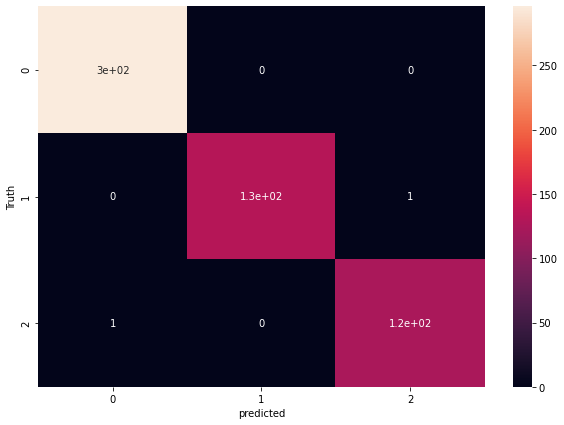

In [172]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [173]:
folds=StratifiedKFold(n_splits=3)
folds

StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [174]:
from sklearn.model_selection import cross_val_score

In [175]:
cross_val_score(LogisticRegression(max_iter=1000),feature_scaled,target,cv=3)

array([0.99837398, 0.99512195, 0.99837398])

In [176]:
cross_val_score(SVC(C=20),feature_scaled,target,cv=3)

array([0.99349593, 0.99186992, 0.98861789])

In [177]:
cross_val_score(RandomForestClassifier(n_estimators=40),feature_scaled,target,cv=3)

array([0.99512195, 0.99186992, 0.99512195])

In [178]:
#import of test data for the model
test_data=pd.read_csv('test_data.tsv', delimiter='\t', index_col=0)
test_data.shape

(16340, 300)

In [179]:
# Transpose test data as t_test_data
t_test_data=test_data.T
t_test_data.head()
t_test_data.shape

(300, 16340)

In [180]:
test_data_scaled=scaler.fit_transform(t_test_data)

In [181]:
#Perform dimenstionality reduction on the test data using PCA
test_data_reduction=pca.fit_transform(test_data_scaled)
test_data_reduction.shape

(300, 214)

In [185]:
model_prediction=lr.predict(test_data_reduction)
model_prediction

array([0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [183]:
# Insert the Prediction to the test dataset
t_test_data['predicted_level']=model_prediction

In [184]:
t_test_data.to_csv('ML_predict.csv',index=True)

In [186]:
test_data_predict=t_test_data.T

In [189]:
test_data_predict.to_csv('ML_predict.csv',sep=',',index=True,encoding='utf-8')